<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/cluster_base%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [179]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [180]:
import warnings

warnings.filterwarnings('ignore')

input

In [181]:
df = pd.read_csv("EPS coded data_base.csv")

exploratory

In [182]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Internal Parity                               5615 non-null   int64
 1   External Parity                               5615 non-null   int64
 2   Desired Delta
Base Pay                        5615 non-null   int64
 3   External Parity desired at inception          5615 non-null   int64
 4   Larger Pay Range                              5615 non-null   int64
 5   Percentage increase vs absolute pay           5615 non-null   int64
 6   Skill differentiation vs job differentiation  5615 non-null   int64
 7   Likelihood of retention for 3 years           5615 non-null   int64
 8   Strong Colleague Network                      5615 non-null   int64
dtypes: int64(9)
memory usage: 394.9 KB


In [183]:
df.head()

,Internal Parity,External Parity,Desired Delta\nBase Pay,External Parity desired at inception,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Likelihood of retention for 3 years,Strong Colleague Network
0,0,1,38,0,1,0,0,4,4
1,0,0,38,0,0,1,1,4,4
2,0,0,38,0,1,1,0,3,3
3,1,0,38,0,1,1,0,4,4
4,0,0,38,1,0,0,1,4,4


checks

In [184]:
df.isnull().sum()
df.describe()

,Internal Parity,External Parity,Desired Delta\nBase Pay,External Parity desired at inception,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Likelihood of retention for 3 years,Strong Colleague Network
count,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000
mean,0.325557,0.261264,30.882814,0.344791,0.374711,0.599288,0.364559,3.664292,3.619768
std,0.468624,0.439363,13.551580,0.475342,0.484091,0.490086,0.481349,1.050064,0.956779
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,0.000000,0.000000,38.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000
75%,1.000000,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000
max,1.000000,1.000000,45.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


In [185]:
X=df

Scaling

In [186]:
cols = X.columns

In [187]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [188]:
X = pd.DataFrame(X, columns=[cols])

In [189]:
X.head()

,Internal Parity,External Parity,Desired Delta\nBase Pay,External Parity desired at inception,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Likelihood of retention for 3 years,Strong Colleague Network
0,0.0,1.0,0.825,0.0,1.0,0.0,0.0,0.75,0.75
1,0.0,0.0,0.825,0.0,0.0,1.0,1.0,0.75,0.75
2,0.0,0.0,0.825,0.0,1.0,1.0,0.0,0.50,0.50
3,1.0,0.0,0.825,0.0,1.0,1.0,0.0,0.75,0.75
4,0.0,0.0,0.825,1.0,0.0,0.0,1.0,0.75,0.75


In [190]:
X.dropna(inplace=True)
X

,Internal Parity,External Parity,Desired Delta\nBase Pay,External Parity desired at inception,Larger Pay Range,Percentage increase vs absolute pay,Skill differentiation vs job differentiation,Likelihood of retention for 3 years,Strong Colleague Network
0,0.0,1.0,0.825,0.0,1.0,0.0,0.0,0.75,0.75
1,0.0,0.0,0.825,0.0,0.0,1.0,1.0,0.75,0.75
2,0.0,0.0,0.825,0.0,1.0,1.0,0.0,0.50,0.50
3,1.0,0.0,0.825,0.0,1.0,1.0,0.0,0.75,0.75
4,0.0,0.0,0.825,1.0,0.0,0.0,1.0,0.75,0.75
...,...,...,...,...,...,...,...,...,...
5610,0.0,0.0,0.250,1.0,0.0,0.0,0.0,0.25,0.50
5611,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.50,0.50
5612,0.0,0.0,0.250,0.0,1.0,1.0,1.0,1.00,1.00
5613,1.0,0.0,0.825,0.0,1.0,1.0,1.0,0.75,0.50


K means

In [191]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [165]:
kmeans.cluster_centers_

array([[ 1.36592051e-01,  4.31703974e-01, -3.66373598e-15,
         3.28917314e-02,  2.73184102e-01,  6.44129740e-02,
         6.12151667e-02,  2.68809921e-01,  5.91724858e-02,
         5.03997259e-01,  5.29237095e-01,  6.81932389e-01,
         6.57035176e-01],
       [ 0.00000000e+00,  3.88578059e-16,  1.00000000e+00,
         2.63677968e-16,  0.00000000e+00, -4.78783679e-16,
        -2.08166817e-16,  2.69285219e-01,  8.48363226e-02,
         4.74978051e-01,  5.05926251e-01,  7.27392450e-01,
         6.80640913e-01]])

inertia

In [192]:
kmeans.inertia_

7025.827657013099

Elbow

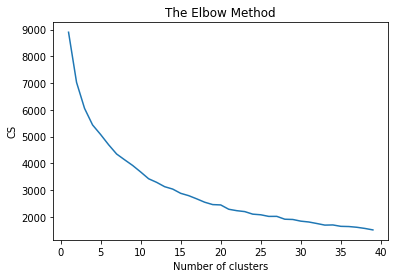

In [193]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

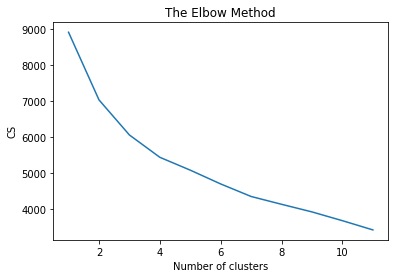

In [194]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [216]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [217]:
labels=kmeans.labels_
print(labels)

[2 5 3 ... 3 3 3]


In [218]:
Z=kmeans.cluster_centers_
Z

array([[ 1.17647059e-01,  2.41596639e-02,  6.53518908e-01,
         3.56092437e-01, -2.38697950e-15,  1.00000000e+00,
         3.88578059e-16,  6.27100840e-01,  6.49422269e-01],
       [ 6.79963735e-02,  2.08522212e-02,  6.42588395e-01,
         4.13417951e-01,  3.07343608e-01,  1.33226763e-15,
        -6.66133815e-16,  6.03581142e-01,  6.14687217e-01],
       [ 9.58405546e-01,  8.76949740e-01,  6.35355286e-01,
         4.02079723e-01,  5.70190641e-01, -1.11022302e-15,
         2.79029463e-01,  7.64298094e-01,  7.01906412e-01],
       [ 1.14203455e-01,  4.03071017e-02,  6.26679463e-01,
         2.14971209e-01,  1.00000000e+00,  8.45489443e-01,
         4.59692898e-01,  6.62188100e-01,  6.42274472e-01],
       [ 1.00000000e+00,  1.00000000e+00,  6.51035503e-01,
         3.33727811e-01,  4.66272189e-01,  1.00000000e+00,
         3.68047337e-01,  7.88757396e-01,  7.21301775e-01],
       [ 1.13138686e-01,  2.55474453e-02,  6.68476277e-01,
         3.67700730e-01, -2.66453526e-15,  6.268248

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 5615 samples in 0.010s...
[t-SNE] Computed neighbors for 5615 samples in 0.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5615
[t-SNE] Computed conditional probabilities for sample 2000 / 5615
[t-SNE] Computed conditional probabilities for sample 3000 / 5615
[t-SNE] Computed conditional probabilities for sample 4000 / 5615
[t-SNE] Computed conditional probabilities for sample 5000 / 5615
[t-SNE] Computed conditional probabilities for sample 5615 / 5615
[t-SNE] Mean sigma: 0.288893
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.242893
[t-SNE] KL divergence after 5000 iterations: 0.225549


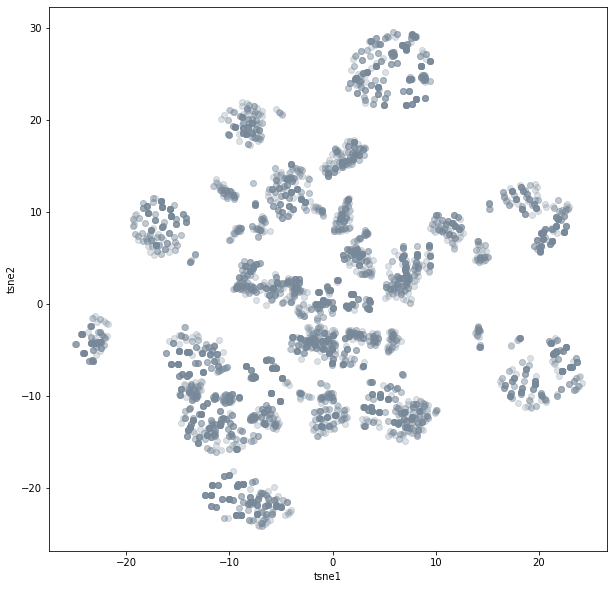

In [219]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [220]:
import matplotlib

In [221]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 5615 samples in 0.007s...
[t-SNE] Computed neighbors for 5615 samples in 0.795s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5615
[t-SNE] Computed conditional probabilities for sample 2000 / 5615
[t-SNE] Computed conditional probabilities for sample 3000 / 5615
[t-SNE] Computed conditional probabilities for sample 4000 / 5615
[t-SNE] Computed conditional probabilities for sample 5000 / 5615
[t-SNE] Computed conditional probabilities for sample 5615 / 5615
[t-SNE] Mean sigma: 0.288893
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.722145
[t-SNE] KL divergence after 2500 iterations: 0.301917


In [222]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

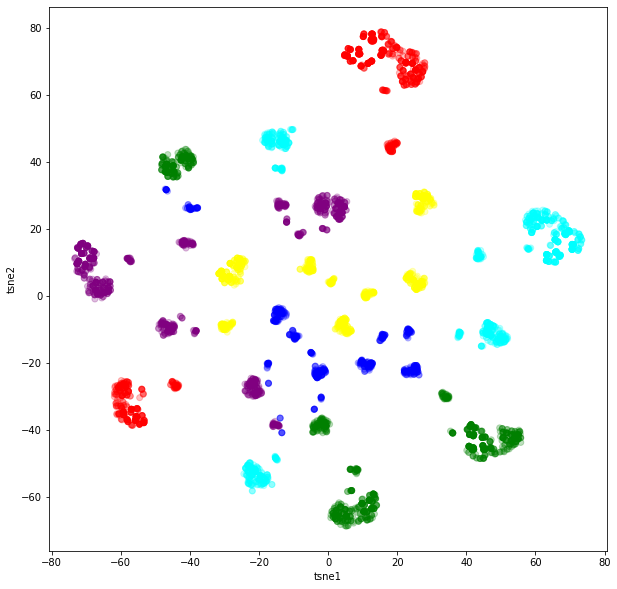

In [223]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [224]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 1.17647059e-01,  2.41596639e-02,  3.11407563e+01,
         3.56092437e-01, -2.38697950e-15,  1.00000000e+00,
         3.88578059e-16,  3.50840336e+00,  3.59768908e+00],
       [ 6.79963735e-02,  2.08522212e-02,  3.07035358e+01,
         4.13417951e-01,  3.07343608e-01,  1.33226763e-15,
        -6.66133815e-16,  3.41432457e+00,  3.45874887e+00],
       [ 9.58405546e-01,  8.76949740e-01,  3.04142114e+01,
         4.02079723e-01,  5.70190641e-01, -1.11022302e-15,
         2.79029463e-01,  4.05719237e+00,  3.80762565e+00],
       [ 1.14203455e-01,  4.03071017e-02,  3.00671785e+01,
         2.14971209e-01,  1.00000000e+00,  8.45489443e-01,
         4.59692898e-01,  3.64875240e+00,  3.56909789e+00],
       [ 1.00000000e+00,  1.00000000e+00,  3.10414201e+01,
         3.33727811e-01,  4.66272189e-01,  1.00000000e+00,
         3.68047337e-01,  4.15502959e+00,  3.88520710e+00],
       [ 1.13138686e-01,  2.55474453e-02,  3.17390511e+01,
         3.67700730e-01, -2.66453526e-15,  6.268248